# Componentes Principales con Librerias

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

raw_data = pd.read_csv('./europe.csv')
features = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']

x = raw_data.loc[:, features].values
y = raw_data.loc[:,['Country']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=0.95, svd_solver='full')

components = pca.fit_transform(x)
df = pd.DataFrame(data = components)
final_df = pd.concat([df, raw_data[['Country']]], axis = 1)
first_component = pd.DataFrame(data=components[:, 0], index=y).T

print(final_df)
print(f'Primer Componente: \n {first_component}')
print(f'Varianza: \n {pca.explained_variance_ratio_}' + "\n")
print(f'Varianza acumulada: \n {pca.explained_variance_ratio_.cumsum()}')
print(f'Autovectores: \n {pca.components_}')
print('First componente: ', first_component.values)
print('First componente: ', first_component.columns)

           0         1         2         3         4         Country
0  -1.081748 -1.270051 -0.514803 -0.413907  0.001251         Austria
1  -0.681094 -0.416041 -0.687292 -0.283364  0.273518         Belgium
2   2.609879  0.269638 -0.623031 -1.331941  0.001946        Bulgaria
3   1.270149  1.901427 -0.831925  0.371907 -0.377894         Croatia
4  -0.167209 -0.131943 -1.001979 -0.263449 -1.047409  Czech Republic
5  -0.955191 -0.409628 -0.732314 -0.391339  0.027888         Denmark
6   2.487735 -0.085779 -0.987538 -0.303984  0.555597         Estonia
7  -0.210563 -0.033717  1.174438 -0.614491 -0.145780         Finland
8  -0.592394 -0.471832  0.992255 -0.843702 -0.981331         Germany
9   1.000472  3.406849  0.738084 -0.793175  1.068531          Greece
10  1.396898 -0.034231 -0.695239 -0.097312  0.050388         Hungary
11 -1.583720 -1.477264 -0.306748  1.251670  0.167241         Iceland
12 -1.808918  0.521808 -0.301615  1.829776  0.372668         Ireland
13 -0.853224  0.327799  1.114486 -

## Valor del primer componente principal para cada pais

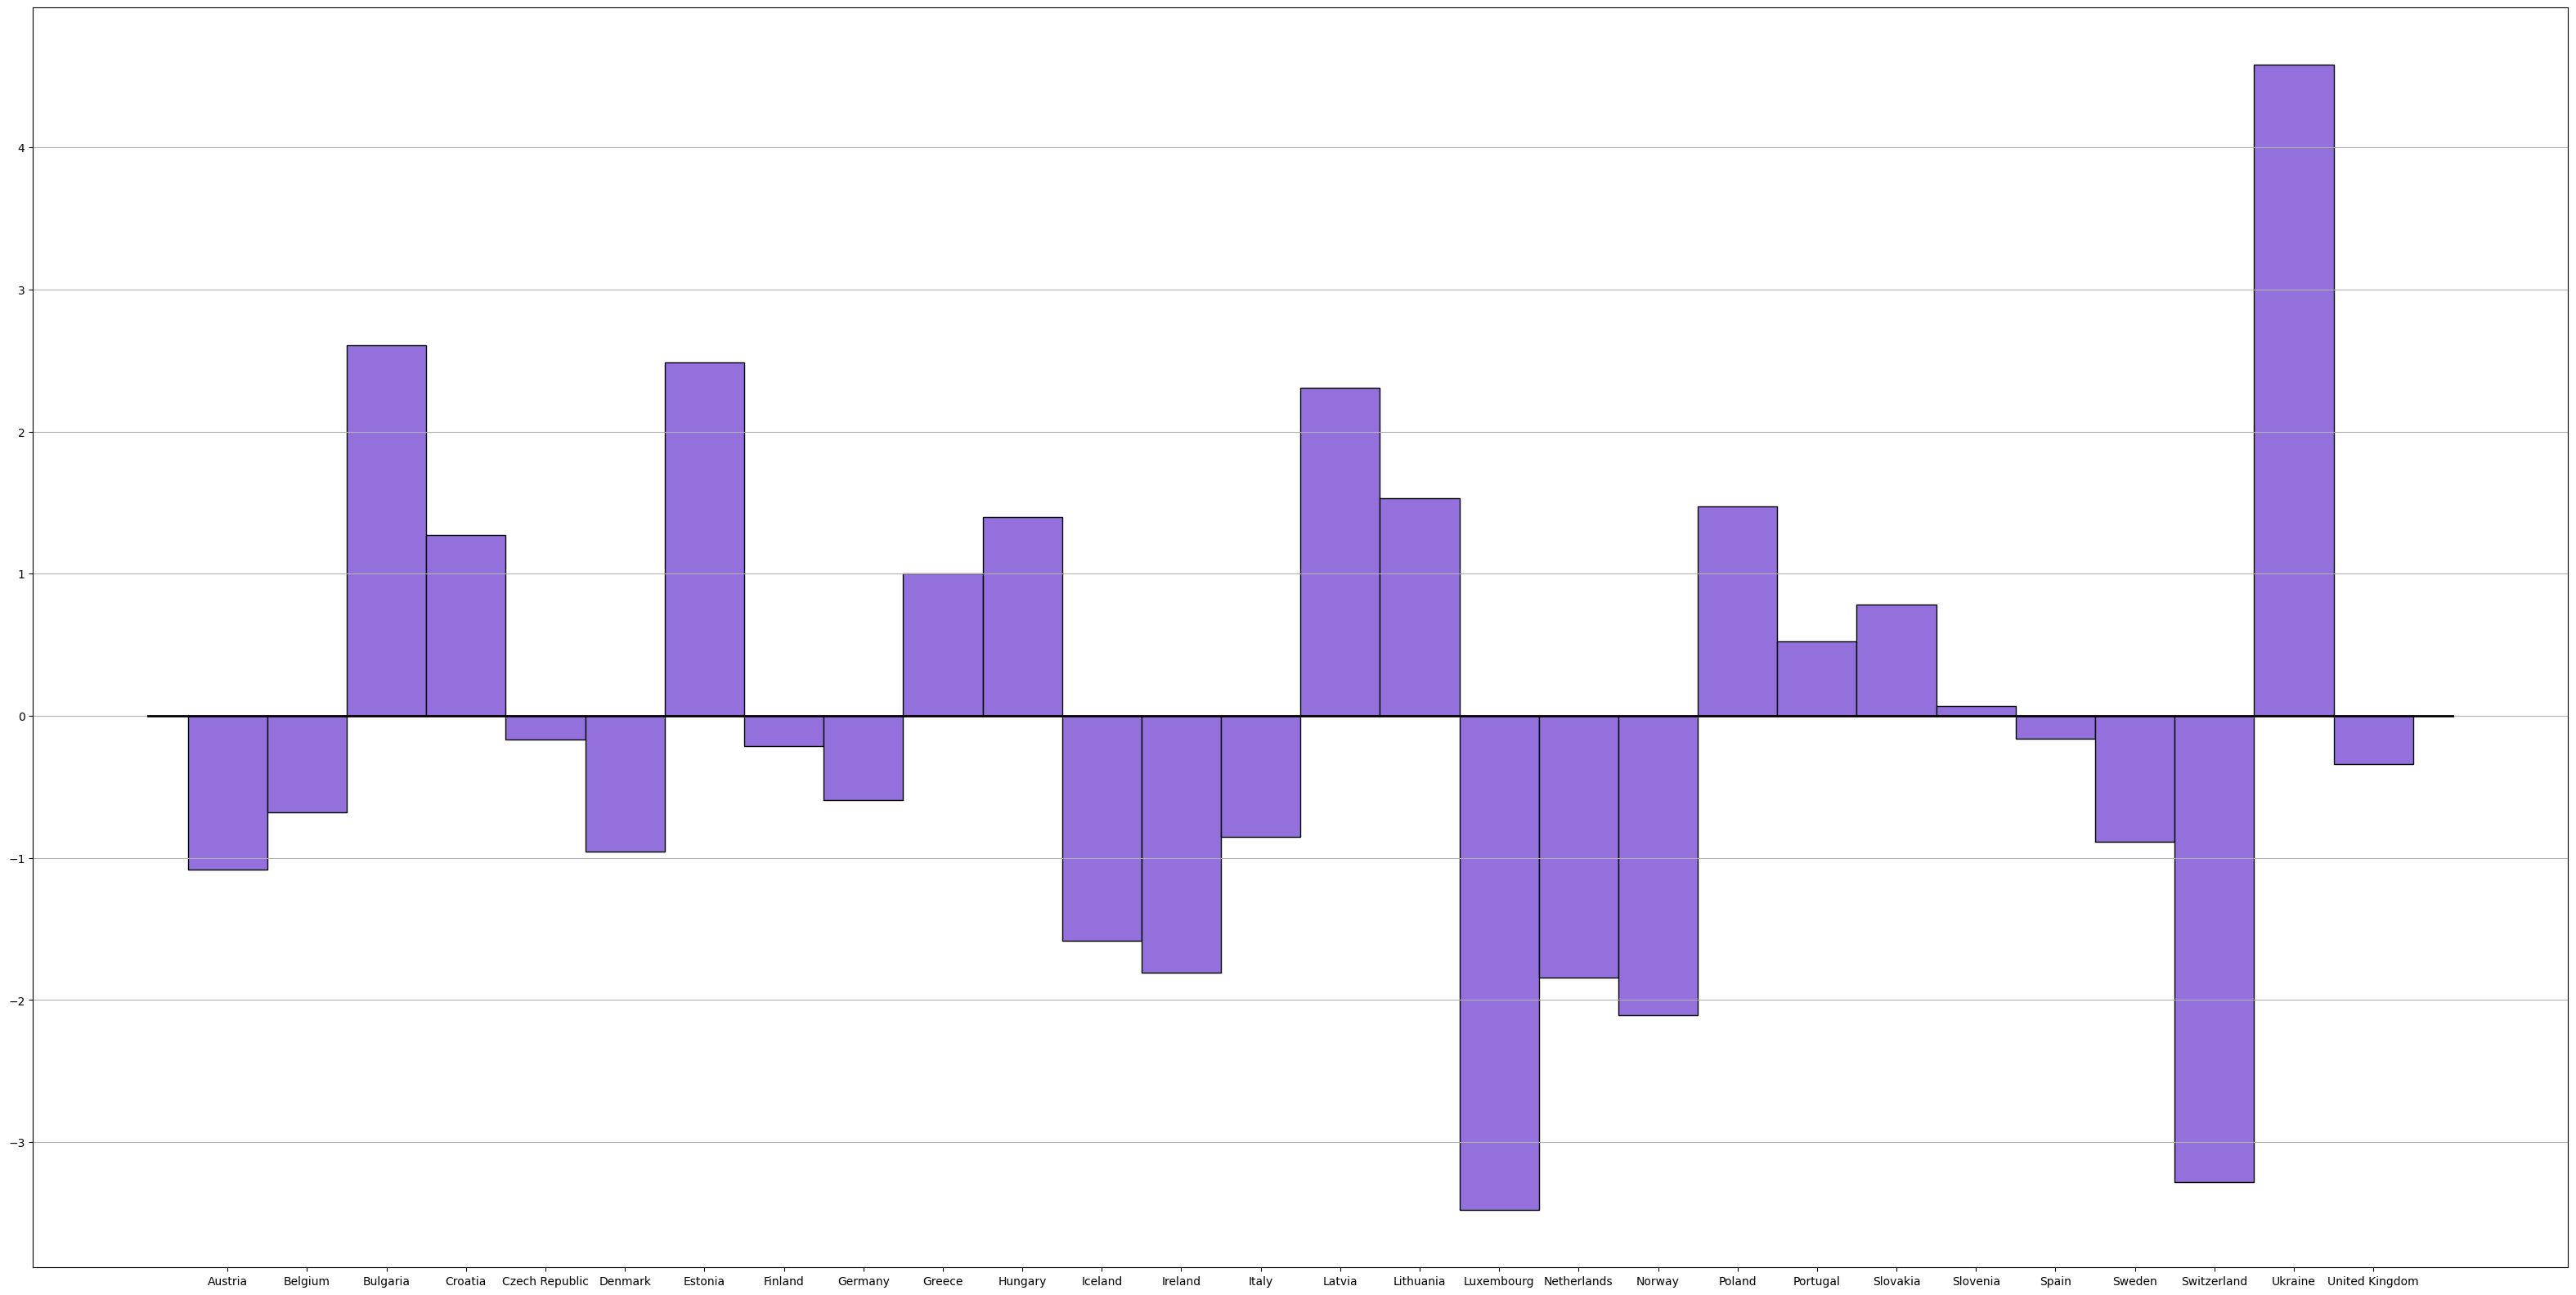

In [2]:
import numpy as np
import matplotlib.pyplot as plt

bars = first_component.values[0]
labels = list(map(lambda t: t[0], first_component.columns))
plt.figure(figsize=(40, 20)) 
plt.grid(axis='y')
plt.bar(labels,bars, width=1, align='center', color='mediumpurple', edgecolor = 'black')
plt.plot(np.linspace(-1,28,num=28), np.zeros(len(bars)), linewidth=2, color='black')
plt.show()

## Influencia de las variables en cada componente

[[ 1.24873902e-01 -5.00505858e-01  4.06518155e-01 -4.82873325e-01
   1.88111616e-01 -4.75703554e-01  2.71655820e-01]
 [-1.72872202e-01 -1.30139553e-01 -3.69657243e-01  2.65247797e-01
   6.58266888e-01  8.26219831e-02  5.53203705e-01]
 [ 8.98296740e-01  8.39557607e-02  1.98194675e-01  2.46082460e-01
   2.43679433e-01  1.63697207e-01  5.00135736e-04]
 [ 4.48503976e-02 -8.42554739e-02  1.64685649e-01  2.67714373e-02
  -5.62374796e-01  3.92462767e-01  7.01967912e-01]
 [-3.24016926e-01  3.90632444e-01  6.89500539e-01 -1.01786561e-01
   3.68147581e-01  3.47867772e-01  1.01587422e-02]]
TRANSPOSE:  [ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]


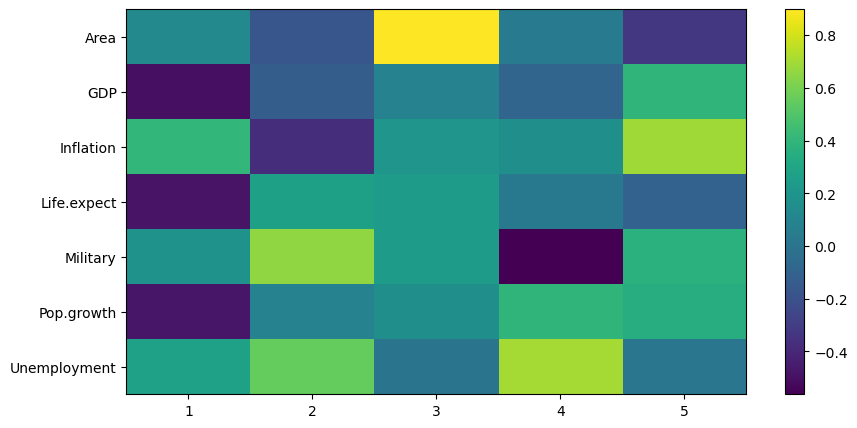

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = pca.components_
print(componentes)
print("TRANSPOSE: ", componentes[0].T)
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(raw_data.columns[1:])), raw_data.columns[1:])
plt.xticks(range(len(componentes)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

## Porcentaje de variancia explicado por cada componente

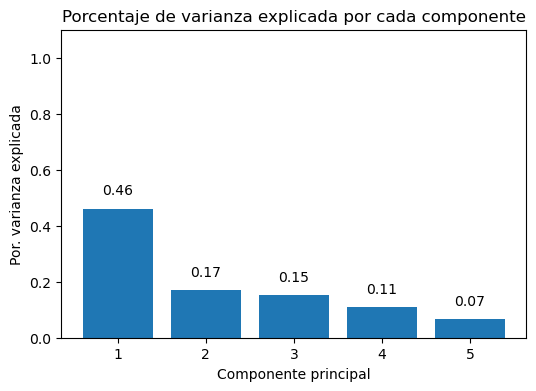

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(raw_data.columns[1:])) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

### Influencia de las variables en la primer componente

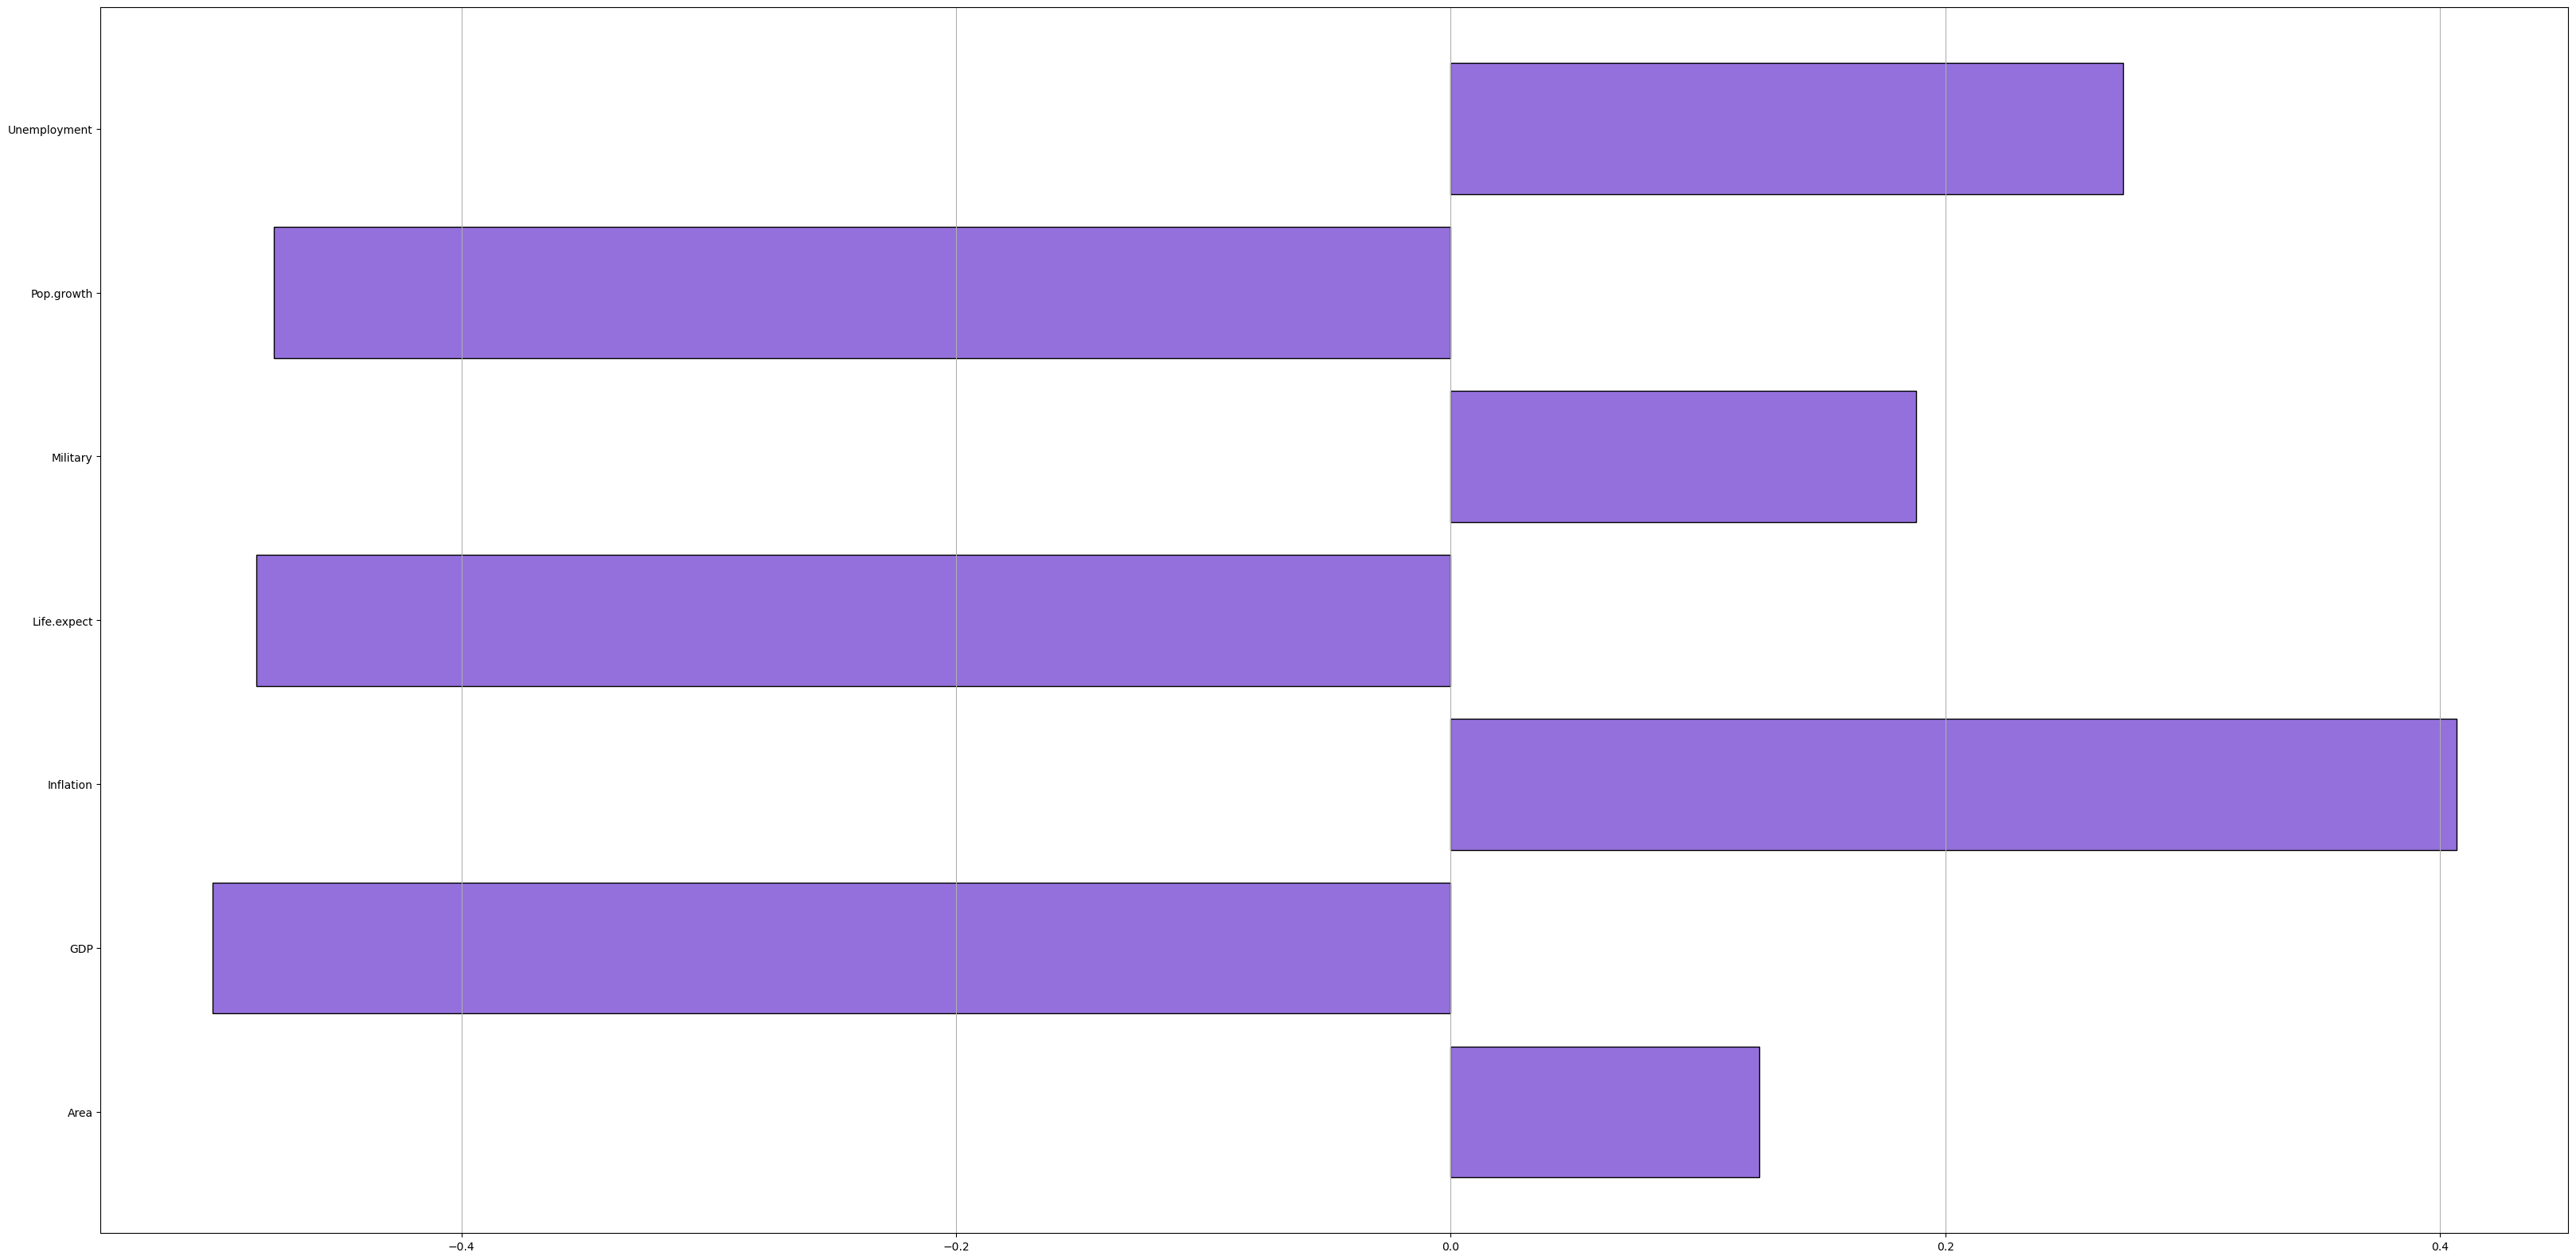

In [5]:
labels = raw_data.columns[1:]

eigenvector_transpose = np.array(componentes[0].T)

plt.figure(figsize=(40, 20)) 
plt.grid(axis='x')
plt.barh(labels, eigenvector_transpose, align='center', color='mediumpurple', edgecolor = 'black')
plt.show()